In [58]:
import numpy as np
import pandas as pd
import seaborn as sns

In [26]:
df = pd.read_csv("esg.csv")

In [27]:
df

,Ticker,Name,Industry,Total ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score
0,MMM,3M Company (MMM),Industrials,34.0,12.6,12.6,8.4
1,AOS,A. O. Smith Corporation (AOS),Industrials,32.0,9.5,14.9,7.6
2,ABT,Abbott Laboratories (ABT),Health Care,31.0,3.7,15.9,11.6
3,ABBV,AbbVie Inc. (ABBV),Health Care,30.0,1.0,16.5,12.8
4,ABMD,"Abiomed, Inc. (ABMD)",Health Care,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
500,NaN,NaN,Consumer Discretionary,NaN,NaN,NaN,NaN
501,NaN,NaN,Information Technology,NaN,NaN,NaN,NaN
502,NaN,NaN,Health Care,NaN,NaN,NaN,NaN
503,NaN,NaN,Financials,NaN,NaN,NaN,NaN


In [28]:
df.isna().sum()

Ticker                    122
Name                      122
Industry                    0
Total ESG Risk Score      149
Environment Risk Score    149
Social Risk Score         149
Governance Risk Score     149
dtype: int64

In [29]:
df=df.dropna()

In [30]:
df

,Ticker,Name,Industry,Total ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score
0,MMM,3M Company (MMM),Industrials,34.0,12.6,12.6,8.4
1,AOS,A. O. Smith Corporation (AOS),Industrials,32.0,9.5,14.9,7.6
2,ABT,Abbott Laboratories (ABT),Health Care,31.0,3.7,15.9,11.6
3,ABBV,AbbVie Inc. (ABBV),Health Care,30.0,1.0,16.5,12.8
5,ACN,Accenture plc (ACN),Information Technology,15.0,1.0,8.2,6.3
...,...,...,...,...,...,...,...
420,SBUX,Starbucks Corporation (SBUX),Consumer Discretionary,21.0,3.0,13.0,5.0
421,STT,State Street Corporation (STT),Financials,22.0,2.0,11.0,8.0
423,SYK,Stryker Corporation (SYK),Health Care,37.0,4.0,20.0,12.0
426,SNPS,"Synopsys, Inc. (SNPS)",Information Technology,20.0,1.0,13.0,6.0


In [11]:
df.describe()

,Total ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score
count,356.000000,356.000000,356.000000,356.000000
mean,24.525281,6.489607,10.800843,7.842416
std,8.190474,7.594667,4.994580,4.716984
min,10.000000,0.000000,1.000000,3.000000
25%,19.000000,1.000000,8.000000,6.000000
50%,23.000000,4.000000,10.000000,7.000000
75%,30.000000,10.000000,13.000000,9.000000
max,63.000000,76.000000,53.000000,67.000000


In [17]:
print(df[df["Total ESG Risk Score"]==max(df["Total ESG Risk Score"])]["Name"])

104    Cigna Corporation (CI)
Name: Name, dtype: object


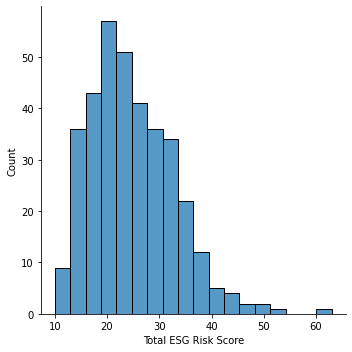

In [57]:
sns.displot(df, x="Total ESG Risk Score")

In [59]:
bin_labels = ['negligent', 'low', 'medium', 'high','severe']
df['ESG Risk'] = pd.cut(df['Total ESG Risk Score'],
                              bins = [0,10,20,30,40,100],
                              labels=bin_labels)
df.head()

<ipython-input-59-e624d67ddc32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ESG Risk'] = pd.cut(df['Total ESG Risk Score'],


,Ticker,Name,Industry,Total ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Performance,ESG Risk
0,MMM,3M Company (MMM),Industrials,34.0,12.6,12.6,8.4,Q2 — satisfactory,high
1,AOS,A. O. Smith Corporation (AOS),Industrials,32.0,9.5,14.9,7.6,Q2 — satisfactory,high
2,ABT,Abbott Laboratories (ABT),Health Care,31.0,3.7,15.9,11.6,Q2 — satisfactory,high
3,ABBV,AbbVie Inc. (ABBV),Health Care,30.0,1.0,16.5,12.8,Q2 — satisfactory,medium
5,ACN,Accenture plc (ACN),Information Technology,15.0,1.0,8.2,6.3,Q1 - poor,low
